<a href="https://colab.research.google.com/github/IUT-Thesis-Group-Cmr/ML-Project/blob/master/ML_Project_Fake_News_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialization tweaks**
* Initiating GoogleDrive mounting
* Necessary Library's imports
* Load Dataset [**Optional**]


In [72]:
#-Google Drive Access-Granting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
#-Library imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math 
import nltk
import string
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn.utils import validation
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, PassiveAggressiveClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, pairwise_distances, mean_absolute_error, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from seaborn import heatmap
from math import exp
from random import randint, seed
import itertools

%matplotlib inline

In [74]:
# Loading Dataset
filePath = '/content/drive/My Drive/ThesisFile/datasets/ml-project/news.csv'
dataset = pd.read_csv(filePath)

print('Dataset Attributes::', dataset.columns)
print('Dataset Dim::', dataset.shape)
print(dataset.head())
print('\nData Output::\n', dataset.label)

Dataset Attributes:: Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
Dataset Dim:: (6335, 4)
   Unnamed: 0  ... label
0        8476  ...  FAKE
1       10294  ...  FAKE
2        3608  ...  REAL
3       10142  ...  FAKE
4         875  ...  REAL

[5 rows x 4 columns]

Data Output::
 0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object


# **Analyzing Dataset**


*   Determining the Labels(outputs) and Inputs



In [75]:
# Outputs or Labels
labels = dataset.label;
print(labels)

# Sample Data
df = dataset[['title','text']]
df

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object


,title,text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene..."


# **Splitting the dataset**

*   Split the dataset into training and testing sets.

In [76]:
# Split Dataset with a 8:2 ratio for training and testing
#         sampple data:: the 'text' column only.
x_train,x_test,y_train,y_test = train_test_split(df['text'], labels, test_size=0.2, 
                                                 random_state=7)
print(x_train)
print(y_train)

6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
                              ...                        
5699                                                     
2550    It’s not that Americans won’t elect wealthy pr...
537     Anyone writing sentences like ‘nevertheless fu...
1220    More Catholics are in Congress than ever befor...
4271    It was hosted by CNN, and the presentation was...
Name: text, Length: 5068, dtype: object
6237    FAKE
3722    FAKE
5774    FAKE
336     REAL
3622    REAL
        ... 
5699    FAKE
2550    REAL
537     REAL
1220    REAL
4271    REAL
Name: label, Length: 5068, dtype: object


# **Dataset Preprocessing using a TfidfVectorizer**

Let’s initialize a ***TfidfVectorizer*** with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a *TfidfVectorizer* turns a collection of raw documents into a matrix of TF-IDF features.

*  **TF (Term Frequency)**: The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.
*  **IDF (Inverse Document Frequency):** Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

In [77]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

print(tfidf_test)

  (0, 60731)	0.05899712902382916
  (0, 60684)	0.033385466151529625
  (0, 60271)	0.04581143542258741
  (0, 60261)	0.07937859313949312
  (0, 59116)	0.10997273171965094
  (0, 59036)	0.08042180974421559
  (0, 58654)	0.07128159375531905
  (0, 58335)	0.0678398429566027
  (0, 57086)	0.12429244186413906
  (0, 55170)	0.20939665348422057
  (0, 54706)	0.035492943055135416
  (0, 54394)	0.10596727423829927
  (0, 54238)	0.06234899619642803
  (0, 53749)	0.04942070163765446
  (0, 53518)	0.117529167732626
  (0, 53144)	0.059982387365669215
  (0, 52555)	0.14065295472127948
  (0, 52483)	0.07360851972393109
  (0, 51960)	0.14065295472127948
  (0, 51955)	0.030414611451489323
  (0, 51663)	0.12057034351821985
  (0, 51527)	0.08134873077710283
  (0, 51159)	0.053278054236854326
  (0, 51005)	0.07360851972393109
  (0, 50068)	0.06481045119580665
  :	:
  (1266, 16835)	0.08080116269909657
  (1266, 16385)	0.0655727278454052
  (1266, 15999)	0.03279926109441314
  (1266, 14890)	0.05544599110567492
  (1266, 13110)	0.066971

# **Learning Model Selection**

Choose a Learning Model, Methodology or Schema for training the dataset.

Here, as it's a classification problem, we are using a ***PassiveAggressiveClassifier*** due to the fact that we have vectorized the sample data during the preprocessing step using a *TfidfVectorizer*.

For explaination purpose, **Passive Aggressive algorithms** are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.


In [78]:
# DataFlair - Initialize a PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=50)
model

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

# **Fitting the Model and Predicting its outcomes.**

Here we will fit the model with the trained vectorized sample data from ```tfidf_train``` of the **TfidfVectorizer** and the ```y_train``` of the initial sample data.

In [79]:
# Fitting the Model with the tfidf_train & y_train.
model.fit(tfidf_train,y_train)

# Predict on the test set tfidf_test from the TfidfVectorizer
y_pred = model.predict(tfidf_test)
print('Predicted Outcomes -->', y_pred, y_pred.shape)

#           and 

# Calculate the accuracy with accuracy_score()
score = accuracy_score(y_test,y_pred)
print(f'\nModel-Accuracy: {round(score*100,2)}%')

Predicted Outcomes --> ['REAL' 'FAKE' 'REAL' ... 'REAL' 'FAKE' 'REAL'] (1267,)

Model-Accuracy: 92.66%


# **Report and Visualization on the selected Model**

From the Previous Step, after training and testing the model using *PassiveAggressiveClassifier* we got an *accuracy* of more than **92.66%** on the testing sample.

For more insights, we will print out the **confusion matrix** to view the number of false and true negatives and positives.

We will also print out the **heat map** generated from the confusion matrix.


In [80]:
# Model Report
report = classification_report(y_test,y_pred, labels=['FAKE','REAL'])

print('----------------=====Model Report=====----------------\n')
print(report)
print('------------------------------------------------------\n')


# Confusion-Matrix
conf_mat = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

print('::Confusion-Matrix::')
print('',conf_mat)
print('------------------------------------------------------\n')


# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision: \t%.2f\n" % metrics.precision_score(y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall: \t%.2f\n" % metrics.recall_score(y_test, y_pred, average='weighted'))
print('------------------------------------------------------\n')

----------------=====Model Report=====----------------

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

------------------------------------------------------

::Confusion-Matrix::
 [[586  52]
 [ 41 588]]
------------------------------------------------------

Precision: 	0.93

Recall: 	0.93

------------------------------------------------------



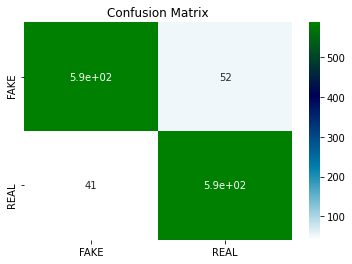

In [81]:
# Visualization of confusion-matrix with a heat-map
# fig = plt.figure(figsize=(10,6))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

sns.heatmap(conf_mat, annot=True, cmap=plt.cm.ocean_r,
            xticklabels=['FAKE','REAL'], 
            yticklabels=['FAKE','REAL'])
plt.show()
